# CAR DATASET

## Importing Libraries

In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [2]:
# load data to a new dataframe
df = pd.read_csv('car_dataset.csv')

## EDA

In [3]:
# check the shape
df.shape

(205, 26)

In [4]:
# first five rows of the dataframe
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# describe the dataframe with some statistical info
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# check data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# check unique data for each feature in the dataframe
df.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
# column names of the dataframe
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Data Selection

In [9]:
# Select the numerical columns
numerical_columns = ['wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']

## Correlation of `Price` with other numerical variables.

In [10]:
# Calculate correlation coefficients with respect to "price"
correlation_with_price = df[numerical_columns].corrwith(df['price']).abs().sort_values(ascending=False)
print(correlation_with_price)

enginesize          0.874145
horsepower          0.808139
citympg             0.685751
wheelbase           0.577816
boreratio           0.553173
peakrpm             0.085267
stroke              0.079443
compressionratio    0.067984
dtype: float64


Enginesize has the highest correlation with price among the numerical columns.

In [50]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from tabulate import tabulate

# Calculate correlation coefficients with respect to "price"
correlation_with_price = df[numerical_columns].corrwith(df['price']).abs().sort_values(ascending=False)

# Convert correlation_with_price series to DataFrame for better tabulation
correlation_table = correlation_with_price.reset_index()
correlation_table.columns = ['Feature', 'Correlation with Price']

# Generate pretty table
pretty_table = tabulate(correlation_table, headers='keys', tablefmt='pretty', showindex=False)

print(pretty_table)


+------------------+------------------------+
|     Feature      | Correlation with Price |
+------------------+------------------------+
|    enginesize    |   0.8741448025245112   |
|    horsepower    |   0.8081388225362212   |
|     citympg      |    0.68575133602704    |
|    wheelbase     |    0.57781559829215    |
|    boreratio     |   0.5531732367984434   |
|     peakrpm      |  0.08526715027785685   |
|      stroke      |   0.079443083881931    |
| compressionratio |  0.06798350579944262   |
+------------------+------------------------+


In [12]:
# Calculate correlation coefficients with respect to "price"
correlation_with_price = df[numerical_columns].corrwith(df['price']).abs().sort_values(ascending=False)

# Get the feature with the highest correlation coefficient
highest_correlation_feature = correlation_with_price.index[0]
highest_correlation_coefficient = correlation_with_price.iloc[0]

print(f"The feature with the highest correlation with 'price' is '{highest_correlation_feature}' with a correlation coefficient of {highest_correlation_coefficient:.6f}.")


The feature with the highest correlation with 'price' is 'enginesize' with a correlation coefficient of 0.874145.


In [13]:
# create a new simple dataframe using the existing one
new_df = df[['enginesize', 'price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


- **Comparing Engine Size and Fuel Type with Price using Scatter Plot**

<Axes: xlabel='enginesize', ylabel='price'>

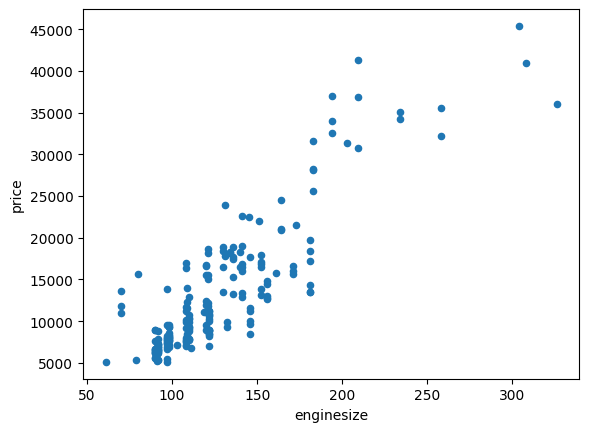

In [14]:
# check the distribution of data by plotting as scatter
new_df.plot(x='enginesize', y='price', kind='scatter')

<Axes: xlabel='fueltypes', ylabel='price'>

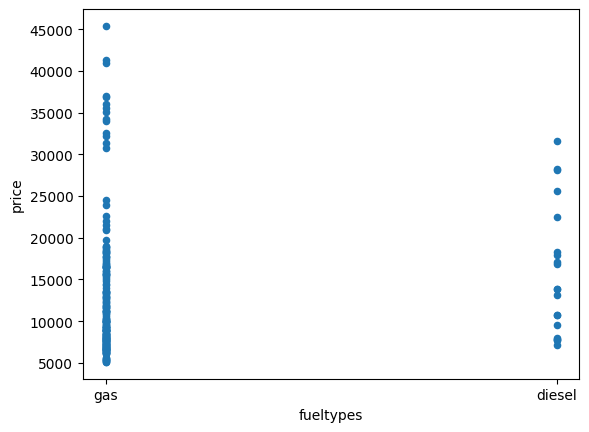

In [15]:
# compare below plot with the previous one
df.plot(x='fueltypes', y='price', kind='scatter')

## Creating a New DataFrame

In [16]:
# define x and y by using the new dataframe
x = new_df['enginesize']
y = new_df['price']

## Splitting data

In [17]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164,)
X_test: (41,)
Y_train: (164,)
Y_test: (41,)


## Model Creation

In [19]:
# create a linear regression model
model = LinearRegression()

## Model Training

In [20]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [21]:
# print coefficient
model.coef_

array([164.31545172])

In [22]:
# print y_intercept | bias
model.intercept_

-7613.370939489803

In [23]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

## Evaluation Metrics

In [24]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  16835544.03813768


In [25]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  3195.0312395000433


In [26]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.7825324721447274


In [27]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  4103.113944084137


In [28]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  16835544.03813768
RMSE -->  4103.113944084137
MAE -->  3195.0312395000433
R2 -->  0.7825324721447274


## Plot actual and predicted values

Text(0, 0.5, 'Predicted')

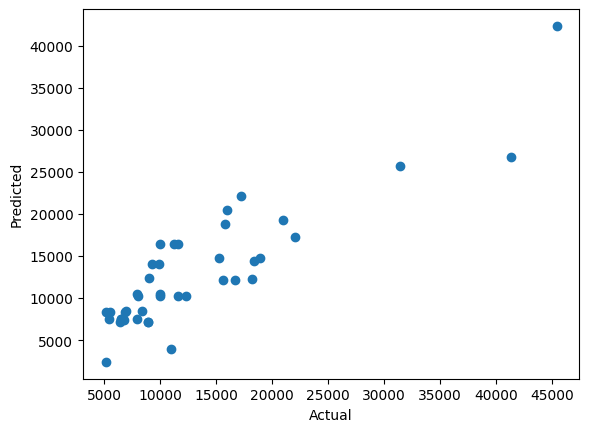

In [29]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

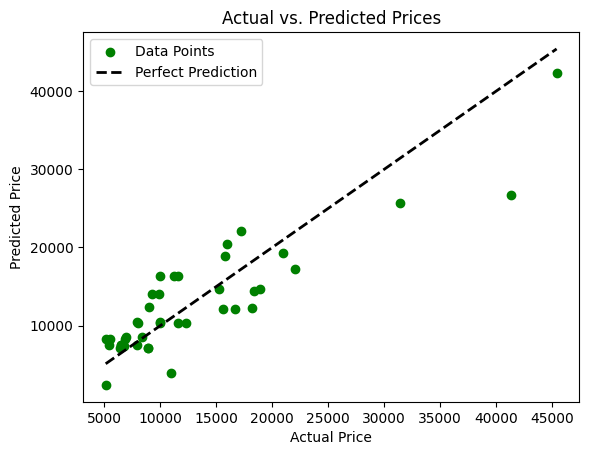

In [30]:
# Plotting actual vs. predicted values with different colors for each group
plt.scatter(y_test, y_pred, c='green', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()

# In a perfect prediction scenario, all points would lie on a diagonal line (y = x).
# This plot helps visualize how well the model predictions align with the actual prices.
# Ideally, all points should cluster around the diagonal line, indicating accurate predictions.
# The scatter plot allows us to identify any patterns or discrepancies between actual and predicted prices.


## Plot regression model line

<Axes: xlabel='enginesize', ylabel='price'>

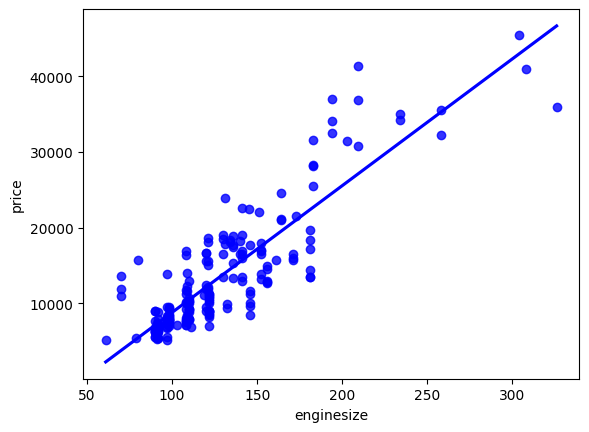

In [40]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

<Axes: xlabel='enginesize', ylabel='price'>

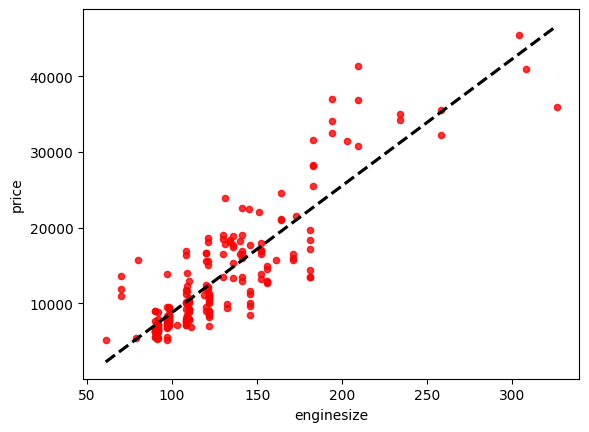

In [35]:
# Plot regression model line and scatter plot with different colors and line style
sns.regplot(x=x, y=y, ci=None, line_kws={"color": "black", "linestyle": "--"}, scatter_kws={"color": "red", "s": 20})

In [37]:
# Convert x_test to a NumPy array
x_test_array = x_test.to_numpy()

# Reshape x_test_array to a 2D array
x_test_reshaped = x_test_array.reshape(-1, 1)

# Use the model for predictions with the reshaped input
predictions =model.predict(x_test_reshaped)

# Print or use the predictions as needed
print(predictions)


[ 7339.33516732 18841.41678794 14733.53049486  2409.87161562
 10297.01329834 16376.68501209  7503.65061904  7503.65061904
 22127.7258224   7503.65061904 19334.36314311 25742.66576031
  3888.71068113 14404.89959141  7175.0197156  16376.68501209
 14076.26868797 14733.53049486 10461.32875006  7503.65061904
 10461.32875006 12104.48326729 14076.26868797 16376.68501209
 20484.57130517  8325.22787766  8489.54332938 12104.48326729
  8489.54332938  8325.22787766 10297.01329834 10297.01329834
 17198.26227071 12433.11417074  8325.22787766 26728.55847065
 10297.01329834 12268.79871901  7175.0197156  42338.52638435
  7175.0197156 ]


# Predicting prices based on engine size

In [45]:
# Iterate over the predicted prices and their corresponding indices
for idx, pred_price in enumerate(predictions):
    # Retrieve the engine size corresponding to the current index
    engine_size = x_test.iloc[idx]  # Assuming engine size is the first column in x_test
    # Print or use the engine size along with the predicted price
    print(f"Engine Size: {engine_size}, Predicted Price: {pred_price}")


Engine Size: 91, Predicted Price: 7339.335167318599
Engine Size: 161, Predicted Price: 18841.416787940445
Engine Size: 136, Predicted Price: 14733.530494861214
Engine Size: 61, Predicted Price: 2409.8716156235205
Engine Size: 109, Predicted Price: 10297.013298335645
Engine Size: 146, Predicted Price: 16376.685012092908
Engine Size: 92, Predicted Price: 7503.650619041768
Engine Size: 92, Predicted Price: 7503.650619041768
Engine Size: 181, Predicted Price: 22127.72582240383
Engine Size: 92, Predicted Price: 7503.650619041768
Engine Size: 164, Predicted Price: 19334.363143109953
Engine Size: 203, Predicted Price: 25742.665760313554
Engine Size: 70, Predicted Price: 3888.7106811320446
Engine Size: 134, Predicted Price: 14404.899591414876
Engine Size: 90, Predicted Price: 7175.019715595428
Engine Size: 146, Predicted Price: 16376.685012092908
Engine Size: 132, Predicted Price: 14076.268687968539
Engine Size: 136, Predicted Price: 14733.530494861214
Engine Size: 110, Predicted Price: 10461.

## Saving Model

In [39]:
## Save the trained model to a file using pickle
model_filename = 'linear_regression_model.pkl' 
with open(model_filename, 'wb') as file: 
    pickle.dump(model, file)
print(f'Model saved to {model_filename}')

Model saved to linear_regression_model.pkl


In [40]:
# Load the saved model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use loaded_model for predictions

In [41]:
# Convert x_test to a NumPy array
x_test_array = x_test.to_numpy()

# Reshape x_test_array to a 2D array
x_test_reshaped = x_test_array.reshape(-1, 1)

# Use the loaded model for predictions with the reshaped input
predictions = loaded_model.predict(x_test_reshaped)

# Print or use the predictions as needed
print(predictions)


[ 7339.33516732 18841.41678794 14733.53049486  2409.87161562
 10297.01329834 16376.68501209  7503.65061904  7503.65061904
 22127.7258224   7503.65061904 19334.36314311 25742.66576031
  3888.71068113 14404.89959141  7175.0197156  16376.68501209
 14076.26868797 14733.53049486 10461.32875006  7503.65061904
 10461.32875006 12104.48326729 14076.26868797 16376.68501209
 20484.57130517  8325.22787766  8489.54332938 12104.48326729
  8489.54332938  8325.22787766 10297.01329834 10297.01329834
 17198.26227071 12433.11417074  8325.22787766 26728.55847065
 10297.01329834 12268.79871901  7175.0197156  42338.52638435
  7175.0197156 ]
